# Damped Ly$\alpha$ Systems


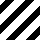
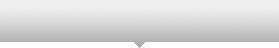
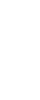
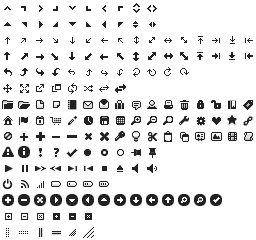
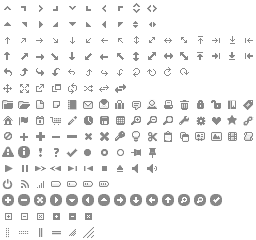
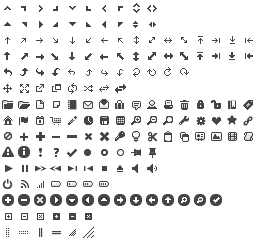
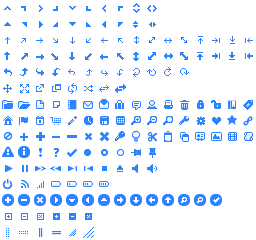
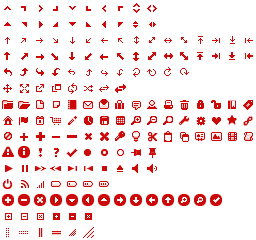
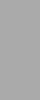
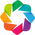
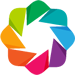
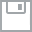
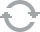
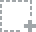
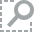
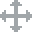
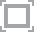
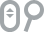

In [12]:
# imports
import copy

from linetools.spectralline import AbsLine
from linetools.analysis import voigt as ltav

from bokeh.io import output_notebook, show, hplot, output_file
from bokeh.plotting import figure
from bokeh.models import Range1d

output_notebook()

In [13]:
# For presentation
pwdth = 600  
phght = 300
# For laptop
#pwdth = 800
#phght = 600

## Damping Wings (revisited)

In [14]:
lya = AbsLine(1215.6700*u.AA)
lya.attrib['N'] = 10.**(13.6)/u.cm**2
lya.attrib['b'] = 30 * u.km/u.s
lya.attrib['z'] = 0.

In [16]:
# Wavelength array for my 'perfect' instrument
wave = np.linspace(1180., 1250., 20000) * u.AA
vel = (wave-1215.67*u.AA)/(1215.67*u.AA) * const.c.to('km/s')

In [17]:
# Bokeh plot
# Lya
pLya1 = figure(plot_width=pwdth, plot_height=phght, title="Varying b-value (NHI = 10^21)")
# Models
bval = [10., 30., 100]
clrs = ['green', 'blue', 'red']
lyai = copy.deepcopy(lya)
lyai.attrib['N'] = 1e21 / u.cm**2
for jj,b in enumerate(bval):
    lyai.attrib['b'] = b*u.km/u.s
    f_obsi = ltav.voigt_from_abslines(wave, [lyai])
    pLya1.line(vel.value, f_obsi.flux.value, color=clrs[jj], line_width=2, 
               legend='b={:0.1f} km/s'.format(b))

# Axes
pLya1.xaxis.axis_label = "Relative Velocity (km/s)"
pLya1.yaxis.axis_label = "Observed flux (normalized)"
#pLee.set(y_range=Range1d(-10,2))
show(pLya1)

/Users/xavier/local/Python/linetools/linetools/analysis/voigt.py:235: UserWarning: Assuming infinite spectral resolution, i.e. no smoothing.
  warnings.warn('Assuming infinite spectral resolution, i.e. no smoothing.')
/Users/xavier/local/Python/linetools/linetools/analysis/voigt.py:236: UserWarning: Set fwhm to smooth.
  warnings.warn('Set fwhm to smooth.')


## Fitting a DLA

In [1]:
# Running 
# python ~/local/Python/xastropy/xastropy/xguis/xfitdlagui.py FJ0812+32_xF.fits -zqso 2.701
#  uses xastropy